<a href="https://colab.research.google.com/github/robet31/RAPIGANTENG/blob/main/Tugas_2-EDA-DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUGAS DATA MINING - EDA**

### **Hasil Analisa Type Data**

In [ ]:
import pandas as pd

# Load dataset
file_path = "tips.csv"
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dataset
df.head()


# **JAWAB PERTANYAAN dengan hasil koding sertakan hasil visualisasi untuk pertanyaan no 4 s/d 9**

## **1. Apakah ada tipe variabel yang kurang tepat?**

Dari hasil analisis tipe data:

*   total_bill dan tip seharusnya bertipe numerik (float), sudah benar.
*   size bertipe integer, sudah benar.
*   sex, smoker, day, dan time bertipe objek (string), tetapi lebih tepat jika dikonversi menjadi kategori agar lebih efisien.

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('tips.csv')

# Periksa tipe data asli
print("Tipe data asli:\n", df.dtypes)

# Ubah tipe data kategorikal
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['day'] = df['day'].astype('category')
df['time'] = df['time'].astype('category')

# Periksa tipe data setelah konversi
print("\nTipe data setelah konversi:\n", df.dtypes)

Tipe data asli:
 total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

Tipe data setelah konversi:
 total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


## **2. Apakah data numerik cenderung berdistribusi normal?**

Data numerik (total_bill, tip, size) tidak berdistribusi normal.
Analisis:



*   Gunakan histogram dan Q-Q plot untuk visualisasi.
*   Uji Shapiro-Wilk (**nilai p < 0.05** → **tidak normal**).





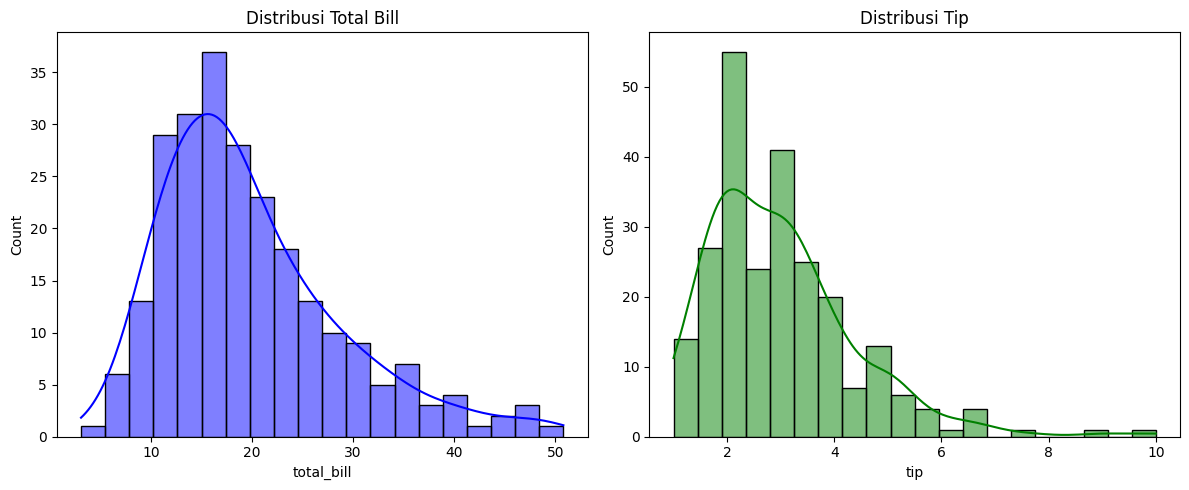

Uji normalitas total_bill: ShapiroResult(statistic=0.9197187941346584, pvalue=3.3245391868090786e-10)
Uji normalitas tip: ShapiroResult(statistic=0.8978110496018736, pvalue=8.200360128656659e-12)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Plot histogram untuk melihat distribusi total_bill dan tip
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df["total_bill"], kde=True, ax=axes[0], bins=20, color='blue')
axes[0].set_title("Distribusi Total Bill")

sns.histplot(df["tip"], kde=True, ax=axes[1], bins=20, color='green')
axes[1].set_title("Distribusi Tip")

plt.tight_layout()
plt.show()

# Uji normalitas dengan Shapiro-Wilk Test
shapiro_total_bill = stats.shapiro(df["total_bill"])
shapiro_tip = stats.shapiro(df["tip"])

shapiro_total_bill, shapiro_tip


# Uji Shapiro-Wilk
print("Uji normalitas total_bill:", stats.shapiro(df['total_bill']))
print("Uji normalitas tip:", stats.shapiro(df['tip']))

## **3. Apakah ada outlier, noise, missing values, atau duplikasi?**

# Langkah 1: Memeriksa Missing Values (Nilai Kosong)

- ternyata tidak ditemukan missing value

In [ ]:
import pandas as pd

# Baca dataset
df = pd.read_csv('tips.csv')

# Cek missing values
print("Missing Values per Kolom:")
print(df.isnull().sum())

Missing Values per Kolom:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


# Langkah 2: Memeriksa Duplikasi Data

---
Cara Memeriksa:

- Gunakan duplicated().sum() untuk menghitung jumlah baris duplikat.

- Jika **hasilnya > 0**, **hapus duplikat** dengan drop_duplicates().

In [ ]:
# # Mengecek jumlah data yang duplikat
# duplicate_count = df.duplicated().sum()
# print(f"Jumlah data duplikat: {duplicate_count}")

# # Menampilkan baris yang duplikat
# df[df.duplicated()]

# # Menampilkan semua data yang terduplikasi (termasuk yang pertama kali muncul)
# df[df.duplicated(keep=False)]


# # Menghapus duplikat dan menyimpan hasilnya
# df_cleaned = df.drop_duplicates()

# # Mengecek jumlah data setelah duplikat dihapus
# print(f"Jumlah data setelah menghapus duplikat: {df_cleaned.shape[0]}")

import pandas as pd

# Membaca dataset
df = pd.read_csv("tips.csv")

# Mengecek jumlah data yang duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

# Jika ada duplikat, lakukan analisis lebih lanjut
if duplicate_count > 0:
    print("\nBaris yang duplikat:")
    print(df[df.duplicated(keep=False)])  # Menampilkan semua versi duplikat (termasuk yang pertama)

    # Menghapus duplikat
    df_cleaned = df.drop_duplicates()

    # Mengecek jumlah data setelah duplikat dihapus
    print(f"\nJumlah data setelah menghapus duplikat: {df_cleaned.shape[0]}")

    # Opsional: Menyimpan dataset yang sudah bersih
    df_cleaned.to_csv("tips_cleaned.csv", index=False)
    print("\nDataset bersih telah disimpan sebagai 'tips_cleaned.csv'")
else:
    print("\nTidak ada data duplikat dalam dataset.")


Jumlah data duplikat: 1

Baris yang duplikat:
     total_bill  tip     sex smoker   day   time  size
198        13.0  2.0  Female    Yes  Thur  Lunch     2
202        13.0  2.0  Female    Yes  Thur  Lunch     2

Jumlah data setelah menghapus duplikat: 243

Dataset bersih telah disimpan sebagai 'tips_cleaned.csv'


# Langkah 3: Memeriksa Outlier (Nilai Ekstrem)

---
Cara Memeriksa:

- Gunakan boxplot untuk kolom numerik (total_bill, tip, size).
- Outlier ditandai dengan titik di luar garis "kumis" (whiskers) pada boxplot.

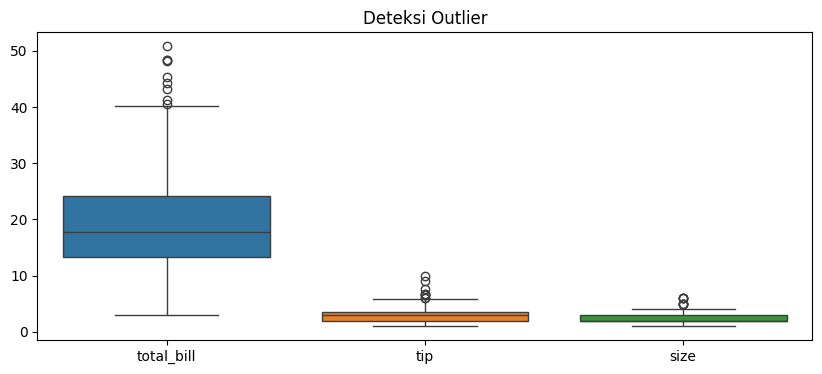

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot untuk total_bill, tip, dan size
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['total_bill', 'tip', 'size']])
plt.title('Deteksi Outlier')
plt.show()

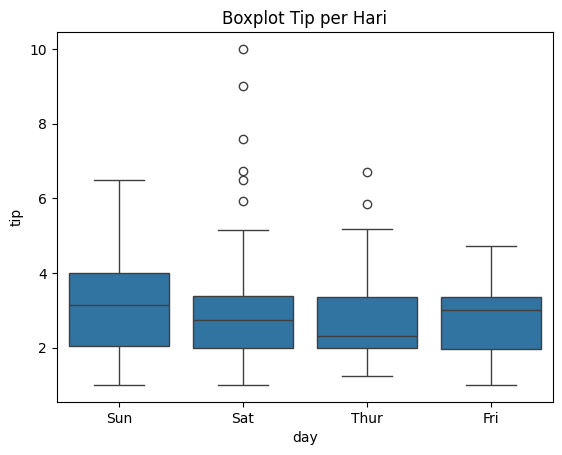

In [48]:
# Contoh: Hapus outlier pada 'tip'
q1 = df['tip'].quantile(0.25)
q3 = df['tip'].quantile(0.75)
iqr = q3 - q1
df_clean = df[(df['tip'] >= q1 - 1.5*iqr) & (df['tip'] <= q3 + 1.5*iqr)]

sns.boxplot(x='day', y='tip', data=df)
plt.title('Boxplot Tip per Hari')
plt.show()

In [ ]:
# Missing values
print("Jumlah missing values:\n", df.isnull().sum())

# Duplikasi
print("\nJumlah baris duplikat:", df.duplicated().sum())

# Outlier (IQR method)
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['tip'] < Q1 - 1.5*IQR) | (df['tip'] > Q3 + 1.5*IQR)]
print("\nJumlah outlier pada kolom 'tip':", len(outliers))

Jumlah missing values:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Jumlah baris duplikat: 1

Jumlah outlier pada kolom 'tip': 9


# Langkah 4: Memeriksa Noise (Data Tidak Masuk Akal)

---
Cara Memeriksa:

1.   Lihat nilai minimum dan maksimum kolom numerik.
2.   Pastikan nilai sesuai dengan logika bisnis:

 -  total_bill harus > 0.
 -  size harus ≥ 1.

In [49]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df[['total_bill', 'tip', 'size']].describe())


Statistik Deskriptif:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


Outliers pada total_bill:
     total_bill    tip     sex smoker   day    time  size
59        48.27   6.73    Male     No   Sat  Dinner     4
102       44.30   2.50  Female    Yes   Sat  Dinner     3
142       41.19   5.00    Male     No  Thur   Lunch     5
156       48.17   5.00    Male     No   Sun  Dinner     6
170       50.81  10.00    Male    Yes   Sat  Dinner     3
182       45.35   3.50    Male    Yes   Sun  Dinner     3
184       40.55   3.00    Male    Yes   Sun  Dinner     2
197       43.11   5.00  Female    Yes  Thur   Lunch     4
212       48.33   9.00    Male     No   Sat  Dinner     4

Outliers pada tip:
     total_bill    tip     sex smoker   day    time  size
23        39.42   7.58    Male     No   Sat  Dinner     4
47        32.40   6.00    Male     No   Sun  Dinner     4
59        48.27   6.73    Male     No   Sat  Dinner     4
141       34.30   6.70    Male     No  Thur   Lunch     6
170       50.81  10.00    Male    Yes   Sat  Dinner     3
183       23.17   6.50    

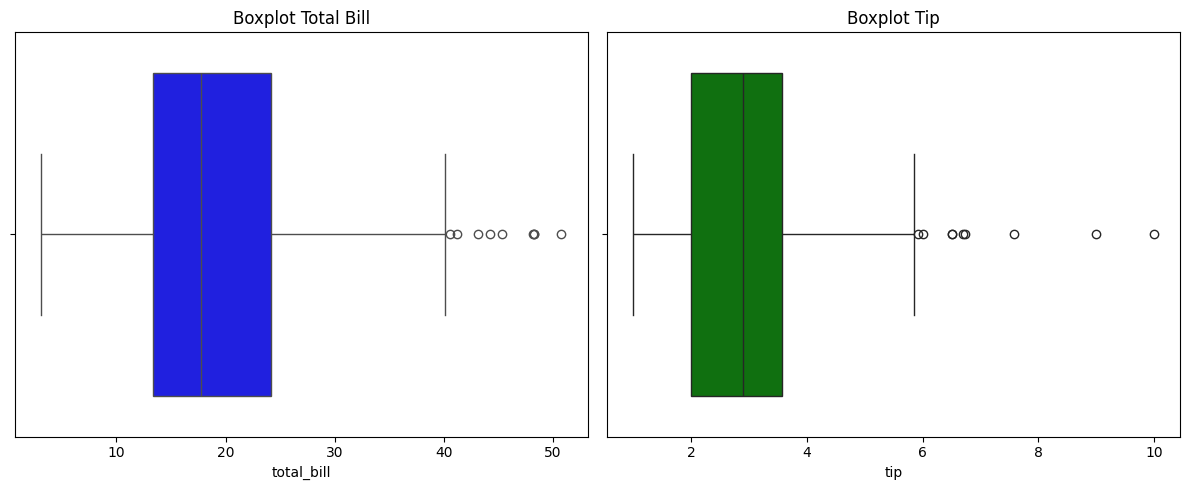

In [ ]:
import seaborn as sns
import numpy as np

# Menentukan batas outlier dengan IQR
def detect_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Cek outlier pada kolom numerik
outliers_total_bill = detect_outliers_iqr(df, "total_bill")
outliers_tip = detect_outliers_iqr(df, "tip")

print("Outliers pada total_bill:")
print(outliers_total_bill)

print("\nOutliers pada tip:")
print(outliers_tip)

# Visualisasi dengan Boxplot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["total_bill"], color="blue")
plt.title("Boxplot Total Bill")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["tip"], color="green")
plt.title("Boxplot Tip")

plt.tight_layout()
plt.show()


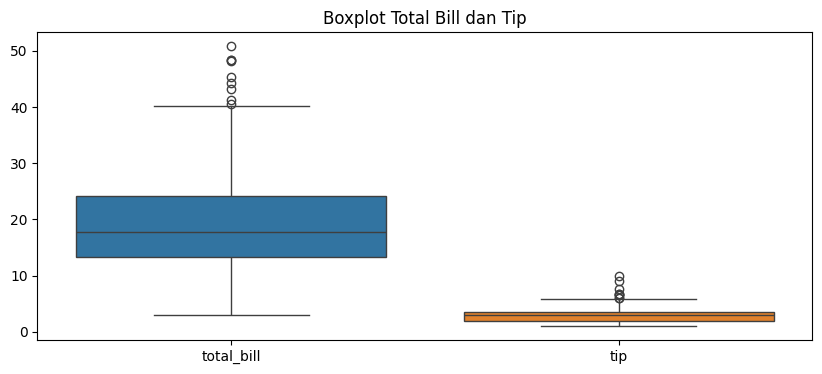

Jumlah data duplikat: 1


In [ ]:
# Boxplot untuk outlier
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['total_bill', 'tip']])
plt.title('Boxplot Total Bill dan Tip')
plt.show()

# Cek duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

## 4. Apakah proporsi pelanggan pria dan wanita seimbang?

sex
Male      157
Female     87
Name: count, dtype: int64


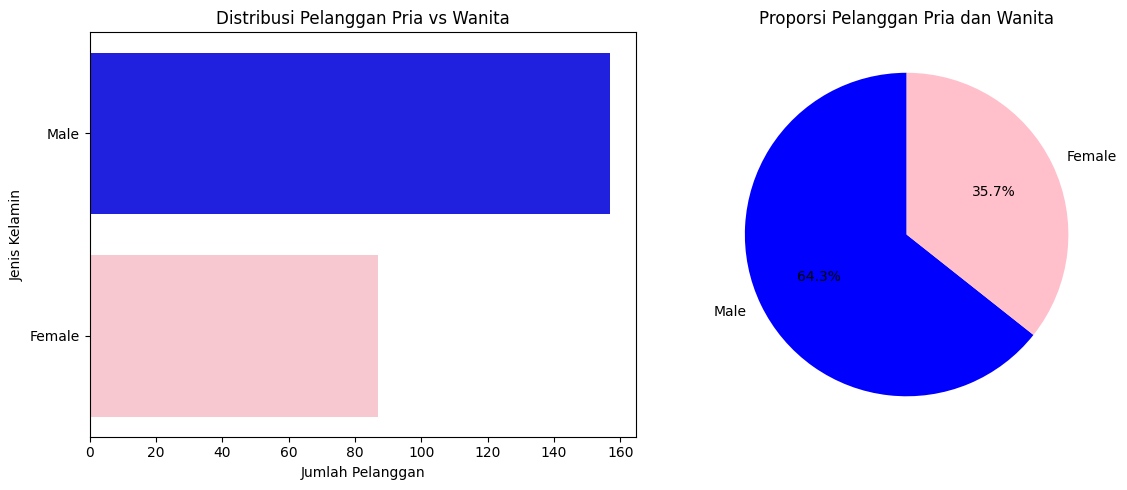

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah pelanggan berdasarkan jenis kelamin
gender_counts = df["sex"].value_counts()

# Menampilkan jumlah pelanggan pria dan wanita
print(gender_counts)

# Membuat subplots untuk menampilkan 2 visualisasi dalam 1 baris
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Visualisasi dengan Horizontal Bar Chart
sns.barplot(y=gender_counts.index, x=gender_counts.values, hue=gender_counts.index, palette=["blue", "pink"], legend=False, orient="h", ax=axes[0])
axes[0].set_ylabel("Jenis Kelamin")
axes[0].set_xlabel("Jumlah Pelanggan")
axes[0].set_title("Distribusi Pelanggan Pria vs Wanita")

# Visualisasi dengan Pie Chart
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=["blue", "pink"], startangle=90)
axes[1].set_title("Proporsi Pelanggan Pria dan Wanita")

# Menampilkan hasil visualisasi
plt.tight_layout()
plt.show()


## 5. Apakah pria atau wanita cenderung memberi tip lebih besar?

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


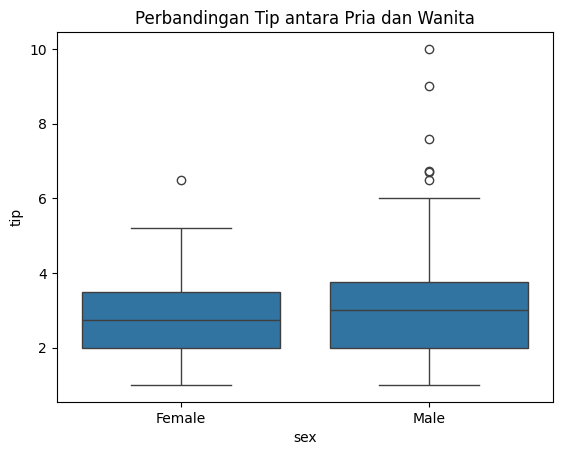

In [ ]:
# Rata-rata tip berdasarkan jenis kelamin
print(df.groupby('sex')['tip'].mean())

# Visualisasi
sns.boxplot(x='sex', y='tip', data=df)
plt.title('Perbandingan Tip antara Pria dan Wanita')
plt.show()

**6. Apakah ada kecenderungan tip lebih besar pada hari tertentu?**

<ipython-input-27-f86f130cac72>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('day')['tip'].mean().sort_values(ascending=False))


day
Sun     3.255132
Sat     2.993103
Thur    2.771452
Fri     2.734737
Name: tip, dtype: float64


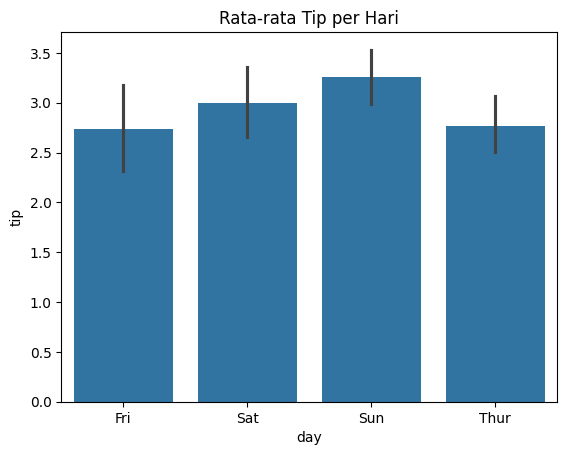

In [ ]:
# Rata-rata tip berdasarkan hari
print(df.groupby('day')['tip'].mean().sort_values(ascending=False))

# Visualisasi
sns.barplot(x='day', y='tip', data=df)
plt.title('Rata-rata Tip per Hari')
plt.show()

**7. Apakah pelanggan perokok cenderung memberi tip lebih besar?**

<ipython-input-28-cf875c73f00e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('smoker')['tip'].mean())


smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64


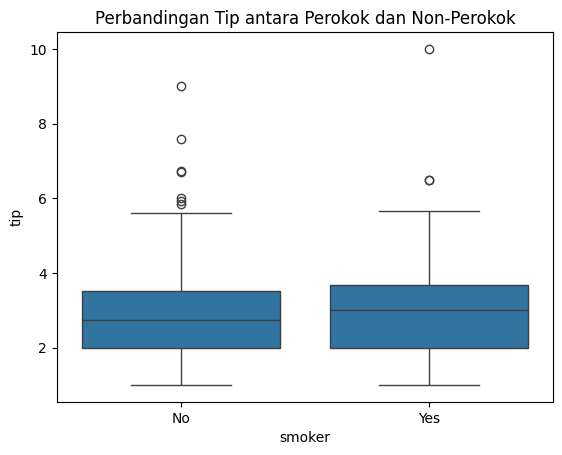

In [ ]:
# Rata-rata tip berdasarkan perokok
print(df.groupby('smoker')['tip'].mean())

# Visualisasi
sns.boxplot(x='smoker', y='tip', data=df)
plt.title('Perbandingan Tip antara Perokok dan Non-Perokok')
plt.show()

**8. Apakah pola di nomor 5 dan 7 dipengaruhi hari?**

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


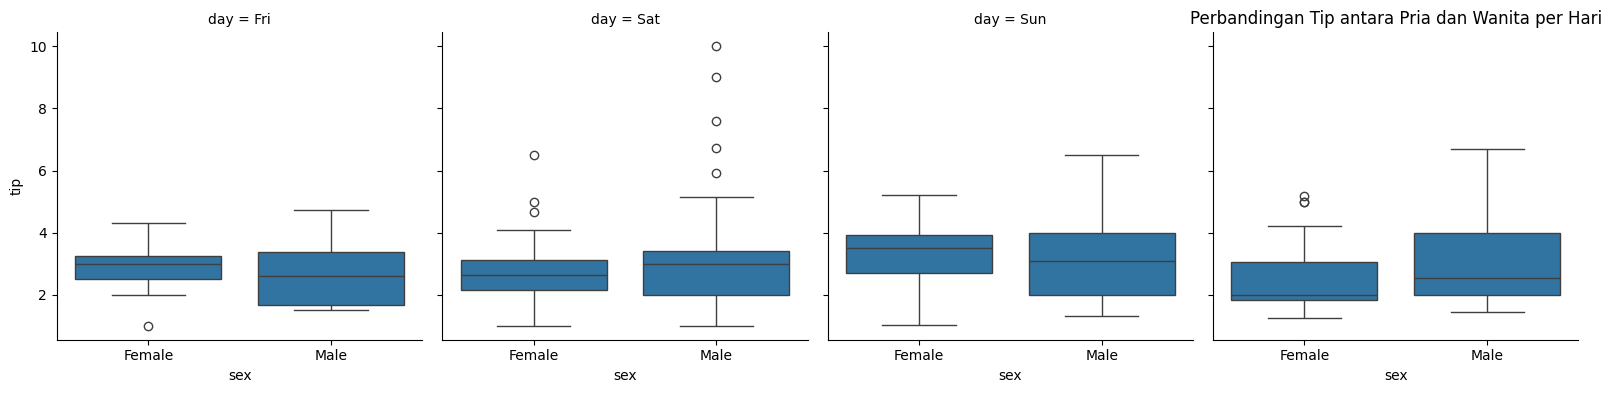

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


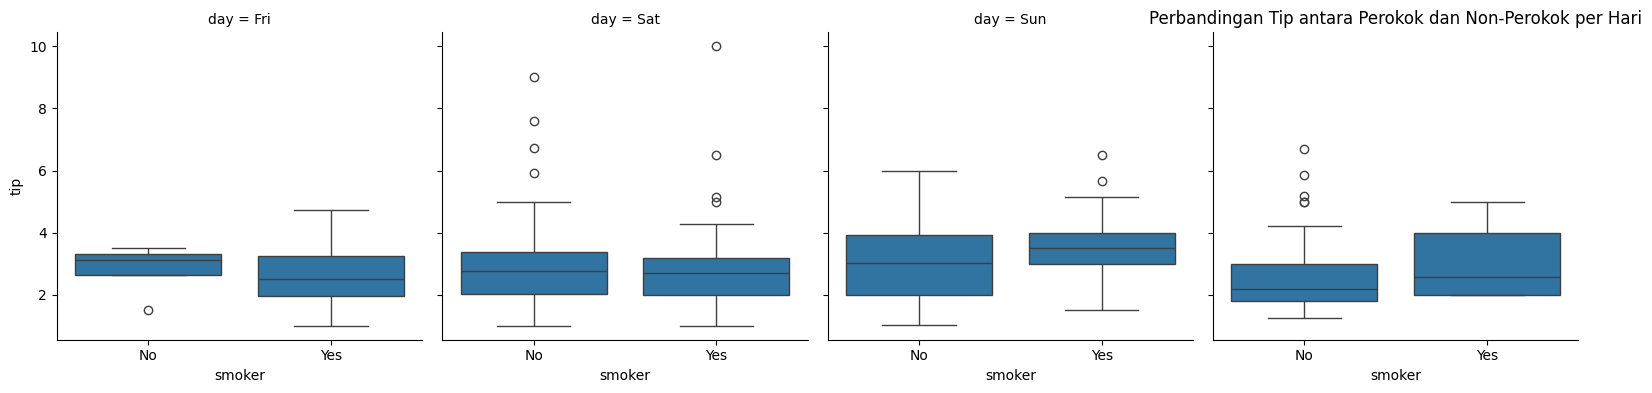

In [ ]:
# Interaksi antara day, sex, dan tip
g = sns.FacetGrid(df, col='day', height=4)
g.map(sns.boxplot, 'sex', 'tip')
g.add_legend()
plt.title('Perbandingan Tip antara Pria dan Wanita per Hari')
plt.show()

# Interaksi antara day, smoker, dan tip
g = sns.FacetGrid(df, col='day', height=4)
g.map(sns.boxplot, 'smoker', 'tip')
g.add_legend()
plt.title('Perbandingan Tip antara Perokok dan Non-Perokok per Hari')
plt.show()

**9. Pola apa yang dapat ditemukan?**

            total_bill       tip
total_bill    1.000000  0.675734
tip           0.675734  1.000000


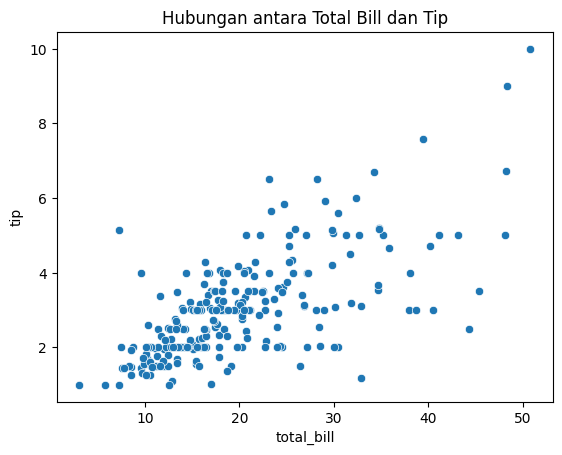

In [ ]:
# Korelasi antara total_bill dan tip
print(df[['total_bill', 'tip']].corr())

# Scatter plot
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Hubungan antara Total Bill dan Tip')
plt.show()

**10. Saran untuk pemilik restoran:**

**11. Skills/Kompetensi yang dibutuhkan:**